# Decision Tree to regression depression scale

## 1. import library

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics

import pandas as pd

## 2. load dataset

In [2]:
data = pd.read_csv("../preprocessing/preprocessing_hn18.csv")
data = data.drop(labels='Unnamed: 0',axis=1)
data.head()

,ID,sex,age,HE_sbp,HE_dbp,HE_ht,HE_wt,HE_BMI,depression_scale,body_fat,r_average,l_average
0,A701020501,1,80,150.0,84.0,162.4,56.0,21.2,0,27.7,20.5,18.1
1,A701021301,1,78,132.0,77.0,167.7,76.4,27.2,0,34.3,39.6,37.4
2,A701021302,2,75,156.0,73.0,157.7,53.2,21.4,0,37.5,16.0,10.5
3,A701022601,2,43,102.0,70.0,151.0,53.5,23.5,0,32.6,24.4,20.6
4,A701023303,2,80,149.0,81.0,146.1,57.6,27.0,0,45.4,12.7,14.3


### Target attribute 분리

In [29]:
# attribute
x = data.drop(labels='ID',axis=1)
x = x.drop(labels='depression_scale',axis=1)
print(x.columns)

x_np = x.to_numpy()
x_np

Index(['sex', 'age', 'HE_sbp', 'HE_dbp', 'HE_ht', 'HE_wt', 'HE_BMI',
       'body_fat', 'r_average', 'l_average'],
      dtype='object')


array([[  1. ,  80. , 150. , ...,  27.7,  20.5,  18.1],
       [  1. ,  78. , 132. , ...,  34.3,  39.6,  37.4],
       [  2. ,  75. , 156. , ...,  37.5,  16. ,  10.5],
       ...,
       [  2. ,  66. ,  98. , ...,  40.9,  20.1,  18.6],
       [  2. ,  73. , 136. , ...,  40.9,  23.2,  21.4],
       [  1. ,  43. , 122. , ...,  26. ,  31.9,  32.4]])

In [30]:
# target attribute
y = data[['depression_scale']]
print(y.columns)

y_np = y.to_numpy()
y_np

Index(['depression_scale'], dtype='object')


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

### Training set, test set을 7:3 비율로 분리 (랜덤하게)

In [31]:
# train, test 분리
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(x_np, y_np, test_size=0.3, random_state=777, stratify=y)

## 3. Decision tree 모형 생성

[Text(607.0953066589823, 801.81, 'r_average <= 28.15\ngini = 0.298\nsamples = 3913\nvalue = [3238, 494, 162, 19]\nclass = d'),
 Text(152.25819229061747, 774.63, 'age <= 32.5\ngini = 0.353\nsamples = 2350\nvalue = [1852, 353, 128, 17]\nclass = d'),
 Text(25.46762170252817, 747.4499999999999, 'HE_ht <= 151.85\ngini = 0.487\nsamples = 338\nvalue = [228, 74, 33, 3]\nclass = d'),
 Text(3.7346858741405002, 720.27, 'HE_BMI <= 21.9\ngini = 0.42\nsamples = 10\nvalue = [3, 7, 0, 0]\nclass = e'),
 Text(1.8673429370702501, 693.0899999999999, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0, 0]\nclass = e'),
 Text(5.602028811210751, 693.0899999999999, 'HE_sbp <= 96.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1, 0, 0]\nclass = d'),
 Text(3.7346858741405002, 665.91, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]\nclass = e'),
 Text(7.4693717482810005, 665.91, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0]\nclass = d'),
 Text(47.20055753091584, 720.27, 'HE_ht <= 158.25\ngini = 0.478\nsamples = 328\nvalue = [2

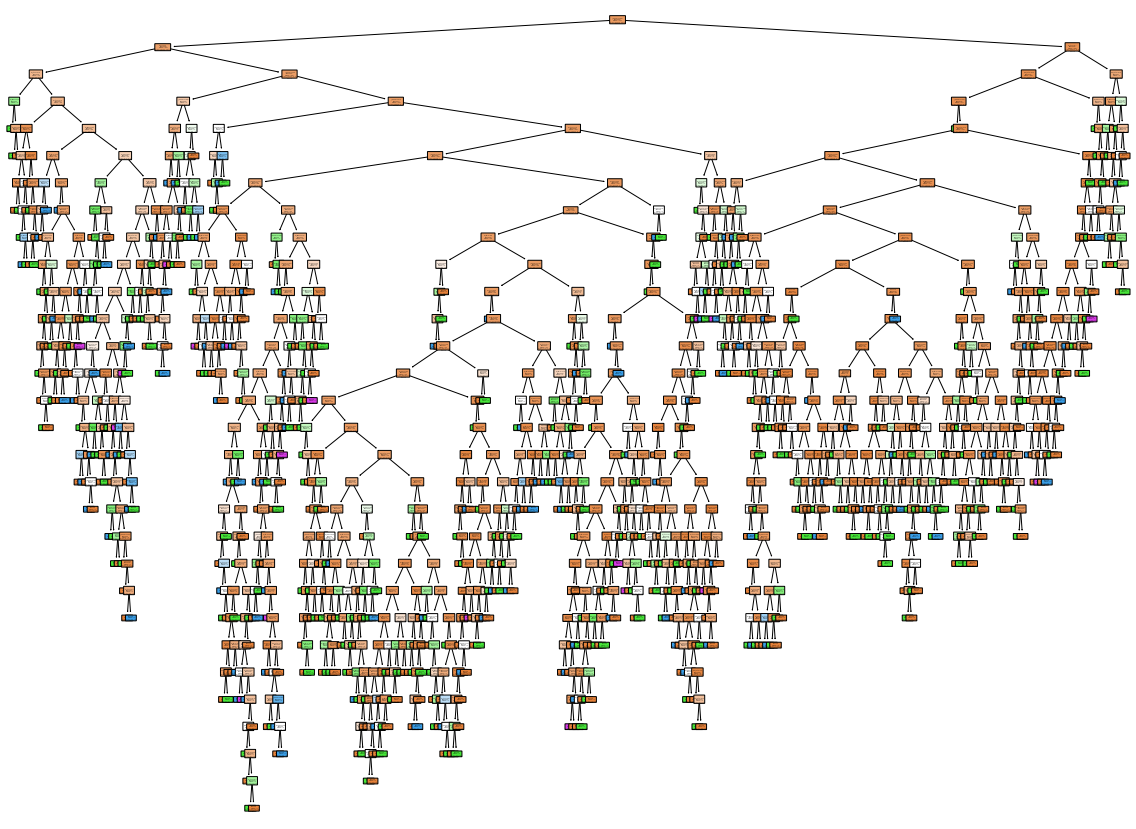

In [32]:
# decision tree 모형 인스턴스 생성
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(df_x_train,df_y_train)

plt.figure( figsize=(20,15) )
tree.plot_tree(tree_model, # 학습한 모형
    feature_names = x.columns, # 사용한 변수 이름
    class_names = y.columns[0], # 예측할 타겟 클래스 이름
    impurity=True,
    filled=True,
    rounded=True
)

In [12]:
# test
y_pred = tree_model.predict(df_x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(df_y_test, y_pred))

Accuracy: 0.7032181168057211


## 4. Pruning
이전 단계의 DT는 과적합 되었을 가능성이 높기 때문에 max_depth를 바꾸면서 test 정확도가 가장 높은 모델을 찾는다.

* depth = 3 / .8253873659117997
* depth = 4 / .8265792610250298
* depth = 5 / .8241954707985697
* depth = 6 / .8170441001191895

max_depth가 4일때 test set 정확도가 가장 높기 때문에, max_depth=4로 설정

[Text(558.0, 733.86, 'r_average <= 28.15\ngini = 0.298\nsamples = 3913\nvalue = [3238, 494, 162, 19]\nclass = d'),
 Text(279.0, 570.78, 'age <= 32.5\ngini = 0.353\nsamples = 2350\nvalue = [1852, 353, 128, 17]\nclass = d'),
 Text(139.5, 407.70000000000005, 'HE_ht <= 151.85\ngini = 0.487\nsamples = 338\nvalue = [228, 74, 33, 3]\nclass = d'),
 Text(69.75, 244.62, 'HE_BMI <= 21.9\ngini = 0.42\nsamples = 10\nvalue = [3, 7, 0, 0]\nclass = e'),
 Text(34.875, 81.54000000000008, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0, 0]\nclass = e'),
 Text(104.625, 81.54000000000008, 'gini = 0.375\nsamples = 4\nvalue = [3, 1, 0, 0]\nclass = d'),
 Text(209.25, 244.62, 'HE_ht <= 158.25\ngini = 0.478\nsamples = 328\nvalue = [225, 67, 33, 3]\nclass = d'),
 Text(174.375, 81.54000000000008, 'gini = 0.212\nsamples = 60\nvalue = [53, 5, 2, 0]\nclass = d'),
 Text(244.125, 81.54000000000008, 'gini = 0.521\nsamples = 268\nvalue = [172, 62, 31, 3]\nclass = d'),
 Text(418.5, 407.70000000000005, 'l_average <= 9.55\ngini

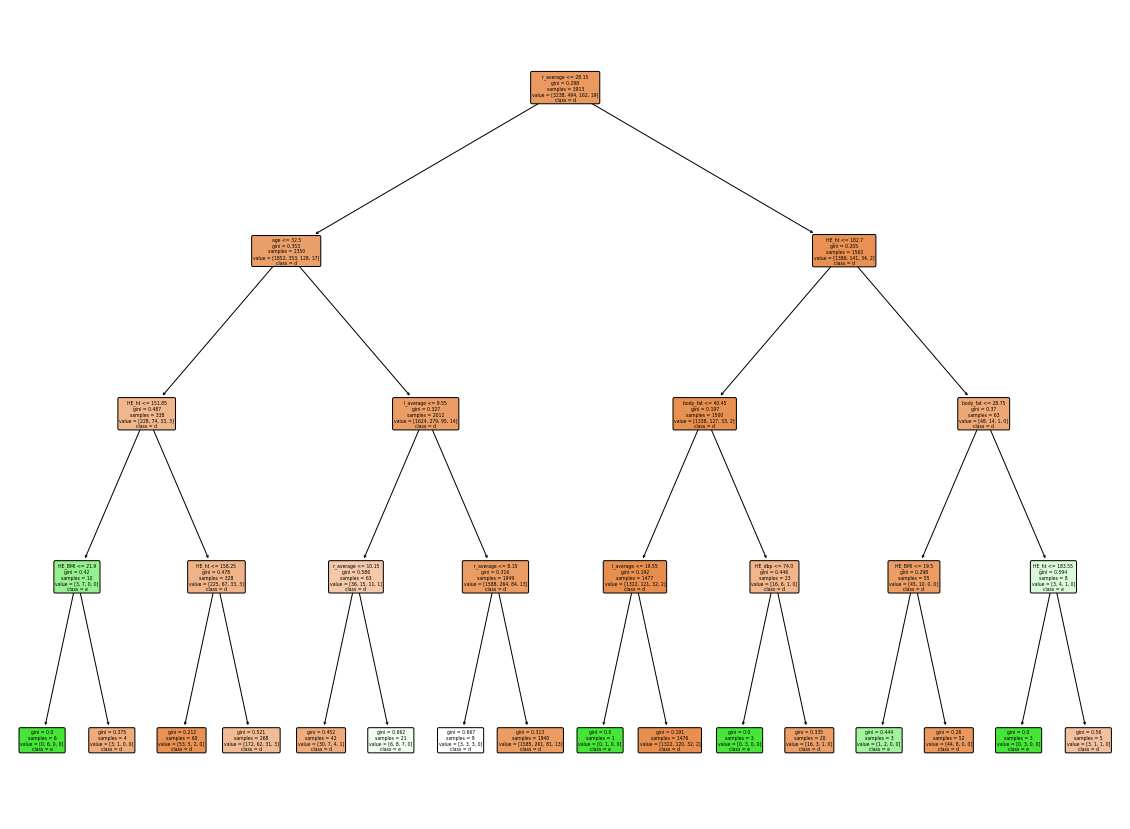

In [33]:
# 과적합 되었으므로, pruning 및 하이퍼파라미터(depth) = 4
tree_model_prun = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model_prun.fit(df_x_train,df_y_train)

plt.figure( figsize=(20,15) )
tree.plot_tree(tree_model_prun, # 학습한 모형
    feature_names = x.columns, # 사용한 변수 이름
    class_names = y.columns[0], # 예측할 타겟 클래스 이름
    impurity=True,
    filled=True,
    rounded=True
)

In [34]:
# test
y_pred = tree_model_prun.predict(df_x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(df_y_test, y_pred))

Accuracy: 0.8265792610250298
